In [110]:
import numpy as np

In [111]:
steps = 10
grid = np.linspace(0, np.pi, 1000)
h = grid[1] - grid[0]


In [112]:
def create_matrix(grid):  
    matrix = []
    for i in range(len(grid)):
        matrix.append(np.zeros(len(grid)))
        if i == 0:
            matrix[i][0] = 1
        
        elif i == len(grid)-1:
        
            matrix[i][i] = 1
        else:
            matrix[i][i-1] = 1
            matrix[i][i] = -2
            matrix[i][i+1] = 1

    matrix = np.array(matrix)
    return matrix


In [113]:
def create_res_v(grid, h):

    res_v = h ** 2 * np.sin(grid)
    res_v[0] = 0
    res_v[-1] = 0

    return res_v

In [114]:
def tridiagonal_matrix_algoritm(matrix, F):
    alpha = np.zeros(len(matrix))
    beta = np.zeros(len(matrix))
    
    
    alpha[0] = matrix[0][1]/matrix[0][0]
    beta[0] = F[0]/matrix[0][0]
    
    for i in range(1, len(matrix)-1):
        alpha[i] = -matrix[i][i+1]/(alpha[i-1] * matrix[i][i-1] + matrix[i][i])
        beta[i] = (F[i] - beta[i-1] * matrix[i][i-1])/(matrix[i][i-1] * alpha[i-1] + matrix[i][i])
    return alpha, beta

In [115]:
def finding_x(alpha, beta, F, matrix):
    x = np.zeros_like(alpha)

    x[-1] = (F[-1] - matrix[-1][-2] * beta[-1])/(matrix[-1][-1] + matrix[-1][-2] * alpha[-1])
    for i in range(len(alpha)-2, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + beta[i+1]
    return x

In [118]:
steps = 500
grid = np.linspace(0, np.pi, steps)
h = grid[1] - grid[0]
true_ans = -np.sin(grid)
matrix = create_matrix(grid)
res_v = create_res_v(grid, h)
alpha = tridiagonal_matrix_algoritm(matrix, res_v)[0]
beta = tridiagonal_matrix_algoritm(matrix, res_v)[1]
answer = finding_x(alpha, beta, res_v, matrix)

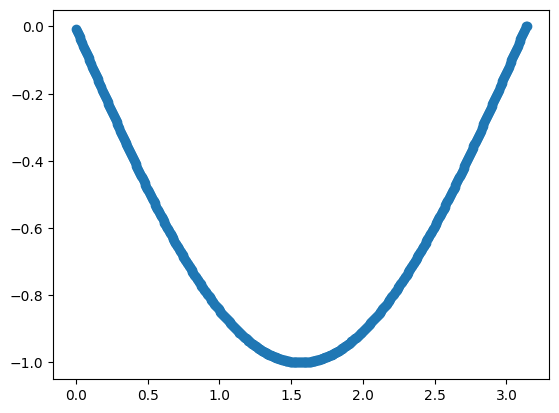

In [119]:
import matplotlib.pyplot as plt
plt.scatter(grid, answer)

Видно порядок сходимости 1

In [72]:
steps = 5
eps = []
answer = []
grid = []
true_ans = []
for i in range(8):
    steps *= 2
    grid = np.linspace(0, np.pi, steps)
    h = grid[1] - grid[0]
    true_ans = -np.sin(grid)
    matrix = create_matrix(grid)
    res_v = create_res_v(grid, h)
    alpha = tridiagonal_matrix_algoritm(matrix, res_v)[0]
    beta = tridiagonal_matrix_algoritm(matrix, res_v)[1]
    answer = finding_x(alpha, beta, res_v, matrix)
    eps.append(np.max(true_ans-answer))
eps

[0.34551424695504324,
 0.16497009963958567,
 0.08051009440883101,
 0.039761754803491534,
 0.019757801556343123,
 0.009848173235510427,
 0.004916410525171555,
 0.0024562870008298103]

In [124]:
def create_matrix(grid):  
    matrix = []
    for i in range(len(grid)):
        matrix.append(np.zeros(len(grid)))
        if i == 0:
            matrix[i][0] = 1
        
        elif i == len(grid)-1:
            matrix[i][i-1] = -1
            matrix[i][i] = 1
        else:
            matrix[i][i-1] = 1
            matrix[i][i] = -2
            matrix[i][i+1] = 1

    matrix = np.array(matrix)
    return matrix
def create_res_v(grid, h):

    res_v = h ** 2 * np.sin(grid)
    res_v[0] =  0
    res_v[-1] = h

    return res_v

In [125]:
steps = 5
steps *= 2
grid = np.linspace(0, np.pi, steps)
h = grid[1] - grid[0]
true_ans = -np.sin(grid)
matrix = create_matrix(grid)
res_v = create_res_v(grid, h)
alpha = tridiagonal_matrix_algoritm(matrix, res_v)[0]
beta = tridiagonal_matrix_algoritm(matrix, res_v)[1]
answer = finding_x(alpha, beta, res_v, matrix)


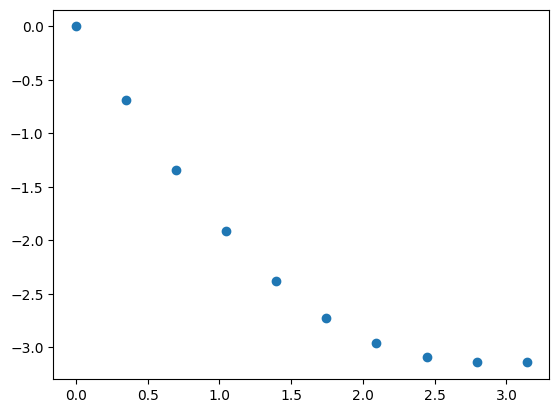

In [120]:
grid = np.linspace(0, np.pi, 10)
val = -np.sin(grid) - grid 
plt.scatter(grid, val)

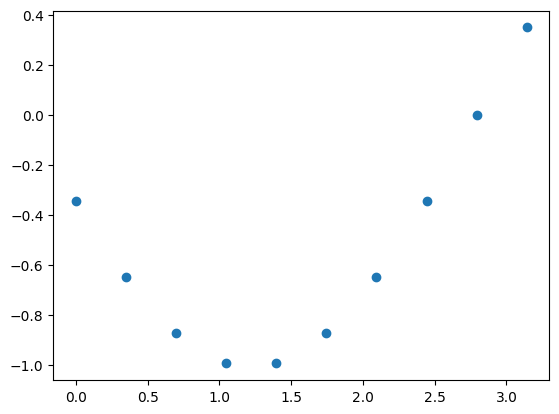

In [126]:
import matplotlib.pyplot as plt
plt.scatter(grid, answer)

In [47]:
np.min(answer)

-0.9999995879420466

In [48]:
np.min(true_ans)

-0.9999987638285973

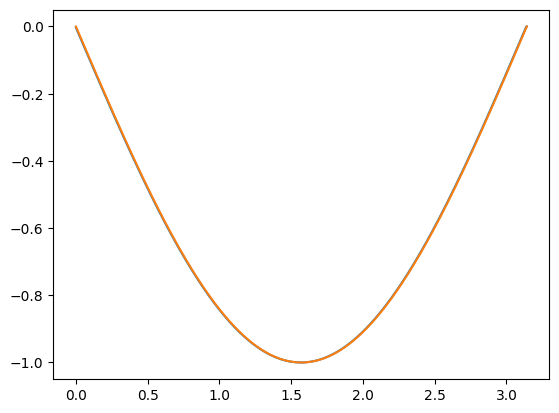

In [49]:
import matplotlib.pyplot as plt 
plt.plot(grid, answer)
plt.plot(grid, true_ans)

In [47]:
beta

array([ 0.00000000e+00, -1.55497153e-08, -5.18321793e-08, -1.08846931e-07,
       -1.86593262e-07, -2.85070220e-07, -4.04276605e-07, -5.44210972e-07,
       -7.04871630e-07, -8.86256640e-07, -1.08836382e-06, -1.31119074e-06,
       -1.55473473e-06, -1.81899286e-06, -2.10396196e-06, -2.40963864e-06,
       -2.73601921e-06, -3.08309979e-06, -3.45087623e-06, -3.83934412e-06,
       -4.24849882e-06, -4.67833545e-06, -5.12884888e-06, -5.60003373e-06,
       -6.09188438e-06, -6.60439495e-06, -7.13755934e-06, -7.69137118e-06,
       -8.26582388e-06, -8.86091057e-06, -9.47662418e-06, -1.01129573e-05,
       -1.07699025e-05, -1.14474518e-05, -1.21455972e-05, -1.28643304e-05,
       -1.36036428e-05, -1.43635255e-05, -1.51439696e-05, -1.59449658e-05,
       -1.67665045e-05, -1.76085759e-05, -1.84711700e-05, -1.93542765e-05,
       -2.02578850e-05, -2.11819846e-05, -2.21265644e-05, -2.30916130e-05,
       -2.40771191e-05, -2.50830709e-05, -2.61094564e-05, -2.71562634e-05,
       -2.82234794e-05, -

In [48]:
res_v[-2]*(h**2)

3.075538773168939e-13

In [49]:
finding_x(alpha, beta, res_v, matrix)

array([-0.00314473, -0.00628944, -0.00943408, -0.01257863, -0.01572305,
       -0.01886732, -0.0220114 , -0.02515527, -0.02829888, -0.03144222,
       -0.03458524, -0.03772792, -0.04087023, -0.04401214, -0.04715361,
       -0.05029461, -0.05343512, -0.0565751 , -0.05971451, -0.06285334,
       -0.06599155, -0.0691291 , -0.07226597, -0.07540213, -0.07853754,
       -0.08167217, -0.08480599, -0.08793898, -0.0910711 , -0.09420231,
       -0.0973326 , -0.10046192, -0.10359025, -0.10671755, -0.1098438 ,
       -0.11296896, -0.11609301, -0.11921591, -0.12233763, -0.12545813,
       -0.1285774 , -0.1316954 , -0.13481209, -0.13792745, -0.14104145,
       -0.14415405, -0.14726523, -0.15037495, -0.15348318, -0.15658989,
       -0.15969506, -0.16279865, -0.16590062, -0.16900096, -0.17209962,
       -0.17519659, -0.17829182, -0.18138529, -0.18447696, -0.18756681,
       -0.1906548 , -0.19374091, -0.1968251 , -0.19990735, -0.20298762,
       -0.20606588, -0.20914211, -0.21221626, -0.21528832, -0.21

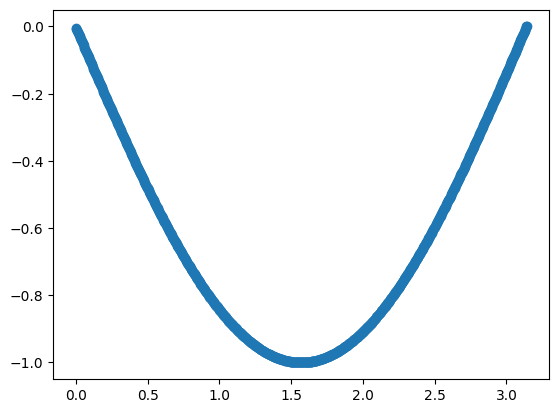

In [50]:
import matplotlib.pyplot as plt
plt.scatter(grid, finding_x(alpha, beta, res_v, matrix))

In [67]:

tridiagonal_matrix_algoritm(matrix, res_v)[0][0], tridiagonal_matrix_algoritm(matrix, res_v)[1][0]

(1.0, -0.1)

In [54]:
matrix

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [32]:
answer = np.zeros(len(grid))
for i in range(len(grid)):
    if i == 0: 
        answer[i] = h
    elif i == len(grid) - 1:
        answer[i] = h
    else:
        answer[i] = np.sin(grid[i]) * np.power(h, 2)
answer

array([0.1       , 0.00099833, 0.00198669, 0.0029552 , 0.00389418,
       0.00479426, 0.00564642, 0.00644218, 0.00717356, 0.00783327,
       0.00841471, 0.00891207, 0.00932039, 0.00963558, 0.0098545 ,
       0.00997495, 0.00999574, 0.00991665, 0.00973848, 0.009463  ,
       0.00909297, 0.00863209, 0.00808496, 0.00745705, 0.00675463,
       0.00598472, 0.00515501, 0.0042738 , 0.00334988, 0.00239249,
       0.0014112 , 0.1       ])

In [ ]:
def tridiagonal_matrix(matrix):
    y0 = 1
    yn = 1
    for i in range(len(grid) - 1): 
        if i == 0:
            y1 = matrix[i][i] + h
        else: 
            
            